In [57]:
import torch
import pandas as pd
import numpy as np
import math
import seaborn as sb
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv("C:\\Users\\Mihailo\\Desktop\\datasets\\SviPodaci_mStanica_BeogradStariGrad.csv",  low_memory=False)
data2 = pd.read_csv("C:\\Users\\Mihailo\\Desktop\\datasets\\SviPodaci_mStanica_BeogradNBG.csv",  low_memory=False)

size, numAttributes = data.shape
size, numAttributes

(95758, 9)

In [59]:
data.sort_values('Datum_i_Vreme', inplace=True)
data2.sort_values('Datum_i_Vreme', inplace=True)

In [60]:
print(data2.shape)
print(size)

(97078, 9)
95758


In [61]:
data.columns

Index(['Datum_i_Vreme', 'MernaStanica', 'B', 'CO', 'NO2', 'O3', 'PM10', 'PM25',
       'SO2'],
      dtype='object')

In [62]:
data2.isna().sum()

Datum_i_Vreme        0
MernaStanica         0
B                51179
CO                4766
NO2              10358
O3               19363
PM10             13955
PM25             13912
SO2               9820
dtype: int64

In [63]:
info= data2.describe()
info

B            CO           NO2            O3          PM10  \
count  4.589900e+04  9.231200e+04  8.672000e+04  7.771500e+04  8.312300e+04   
mean  -1.043618e+27 -1.914498e+25 -3.346551e+25 -3.894596e+25 -1.774821e+26   
std    2.235853e+29  5.816797e+27  9.855010e+27  1.085712e+28  5.116997e+28   
min   -4.790103e+31 -1.767311e+30 -2.902129e+30 -3.026685e+30 -1.475285e+31   
25%    2.405672e-01  2.688711e-01  1.429574e+01  1.321868e+01  1.560000e+01   
50%    6.800000e-01  4.500000e-01  2.400000e+01  3.584544e+01  2.520000e+01   
75%    1.670000e+00  7.477865e-01  4.030000e+01  6.220000e+01  4.035719e+01   
max    3.246900e+11  9.319200e+10  1.530320e+11  1.596000e+11  1.000000e+11   

               PM25           SO2  
count  8.316600e+04  8.725800e+04  
mean  -1.773906e+26 -4.730752e+25  
std    5.115683e+28  1.397439e+28  
min   -1.475287e+31 -4.127960e+30  
25%    8.955949e+00  8.010859e+00  
50%    1.684189e+01  1.396176e+01  
75%    3.154686e+01  2.578732e+01  
max    1.000000e+11  4.631304e+10

In [64]:
info2 = data2.describe()
info2

B            CO           NO2            O3          PM10  \
count  4.589900e+04  9.231200e+04  8.672000e+04  7.771500e+04  8.312300e+04   
mean  -1.043618e+27 -1.914498e+25 -3.346551e+25 -3.894596e+25 -1.774821e+26   
std    2.235853e+29  5.816797e+27  9.855010e+27  1.085712e+28  5.116997e+28   
min   -4.790103e+31 -1.767311e+30 -2.902129e+30 -3.026685e+30 -1.475285e+31   
25%    2.405672e-01  2.688711e-01  1.429574e+01  1.321868e+01  1.560000e+01   
50%    6.800000e-01  4.500000e-01  2.400000e+01  3.584544e+01  2.520000e+01   
75%    1.670000e+00  7.477865e-01  4.030000e+01  6.220000e+01  4.035719e+01   
max    3.246900e+11  9.319200e+10  1.530320e+11  1.596000e+11  1.000000e+11   

               PM25           SO2  
count  8.316600e+04  8.725800e+04  
mean  -1.773906e+26 -4.730752e+25  
std    5.115683e+28  1.397439e+28  
min   -1.475287e+31 -4.127960e+30  
25%    8.955949e+00  8.010859e+00  
50%    1.684189e+01  1.396176e+01  
75%    3.154686e+01  2.578732e+01  
max    1.000000e+11  4.631304e+10

In [65]:
print(data2.isna().sum().sum())

123353


In [66]:
print(data.isna().sum().sum())

154638


In [67]:
SO2_q1 = info['CO']['25%']
SO2_q3 = info['CO']['75%']
IQR = SO2_q3-SO2_q1

<ipython-input-68-aa8c7265465d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO'][i] = 0.0
<ipython-input-68-aa8c7265465d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO'][i] =  SO2_q3+1.50*IQR


Text(0.5, 0, 'merenja')

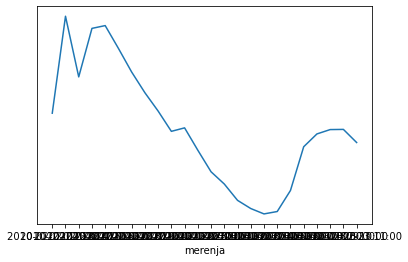

In [68]:

x = data['CO'][lambda a : a > SO2_q1-1.50*IQR]
x = x[lambda a : a < SO2_q3 + 1.50*IQR]
autlajeri_donji = lambda a : (a < SO2_q1-1.50*IQR)
autlajeri_gornji = lambda a : (a > SO2_q3+1.50*IQR)

for i in range(size):
    x = data['CO'][i]
    if autlajeri_donji(x) or x < 0.0 :
        data['CO'][i] = 0.0
    elif autlajeri_gornji(x) :
        data['CO'][i] =  SO2_q3+1.50*IQR
  
x = data['CO'][:24]
#y = data['CO']
#x = x[lambda a : a < 1]
#y = data['CO']
#x = x[:(48)]
y = data['Datum_i_Vreme'][:24]
#plt.plot(x)
plt.plot(y, x)
plt.yticks([])

#plt.plot(y)
plt.xlabel('merenja')

In [69]:
def autlajeri(data, n = 3.0, step=48):
    fig = plt.figure(figsize=(70, 70))
    j = 1
    for name, color in zip(['B', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2'], ['red', 'green', 'blue', 'orange', 'purple', 'black', 'cyan']):
        fig.add_subplot(7, 1, j)
        j = j+1

        q1 = info[name]['25%']
        q3 = info[name]['75%']
        IQR = q3-q1
        x = data[name][lambda a : a > SO2_q1-n*IQR]
        x = x[lambda a : a < SO2_q3 + n*IQR]
        autlajeri_donji = lambda a : (a < SO2_q1-n*IQR)
        autlajeri_gornji = lambda a : (a > SO2_q3+n*IQR)

        for i in range(size):
            x = data[name][i]
            if autlajeri_donji(x) or x < 0.0 :
                data[name][i] = 0.0
            elif autlajeri_gornji(x) :
                data[name][i] =  SO2_q3+n*IQR

        x = data[name][::step]
        y = data['Datum_i_Vreme'][::step]
        plt.plot(y, x, color=color)
        plt.xticks([])

    plt.show()
    return data


<ipython-input-69-2c1dff6808bc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name][i] =  SO2_q3+n*IQR
<ipython-input-69-2c1dff6808bc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name][i] =  SO2_q3+n*IQR
<ipython-input-69-2c1dff6808bc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name][i] = 0.0
<ipython-input-69-2c1dff6808bc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

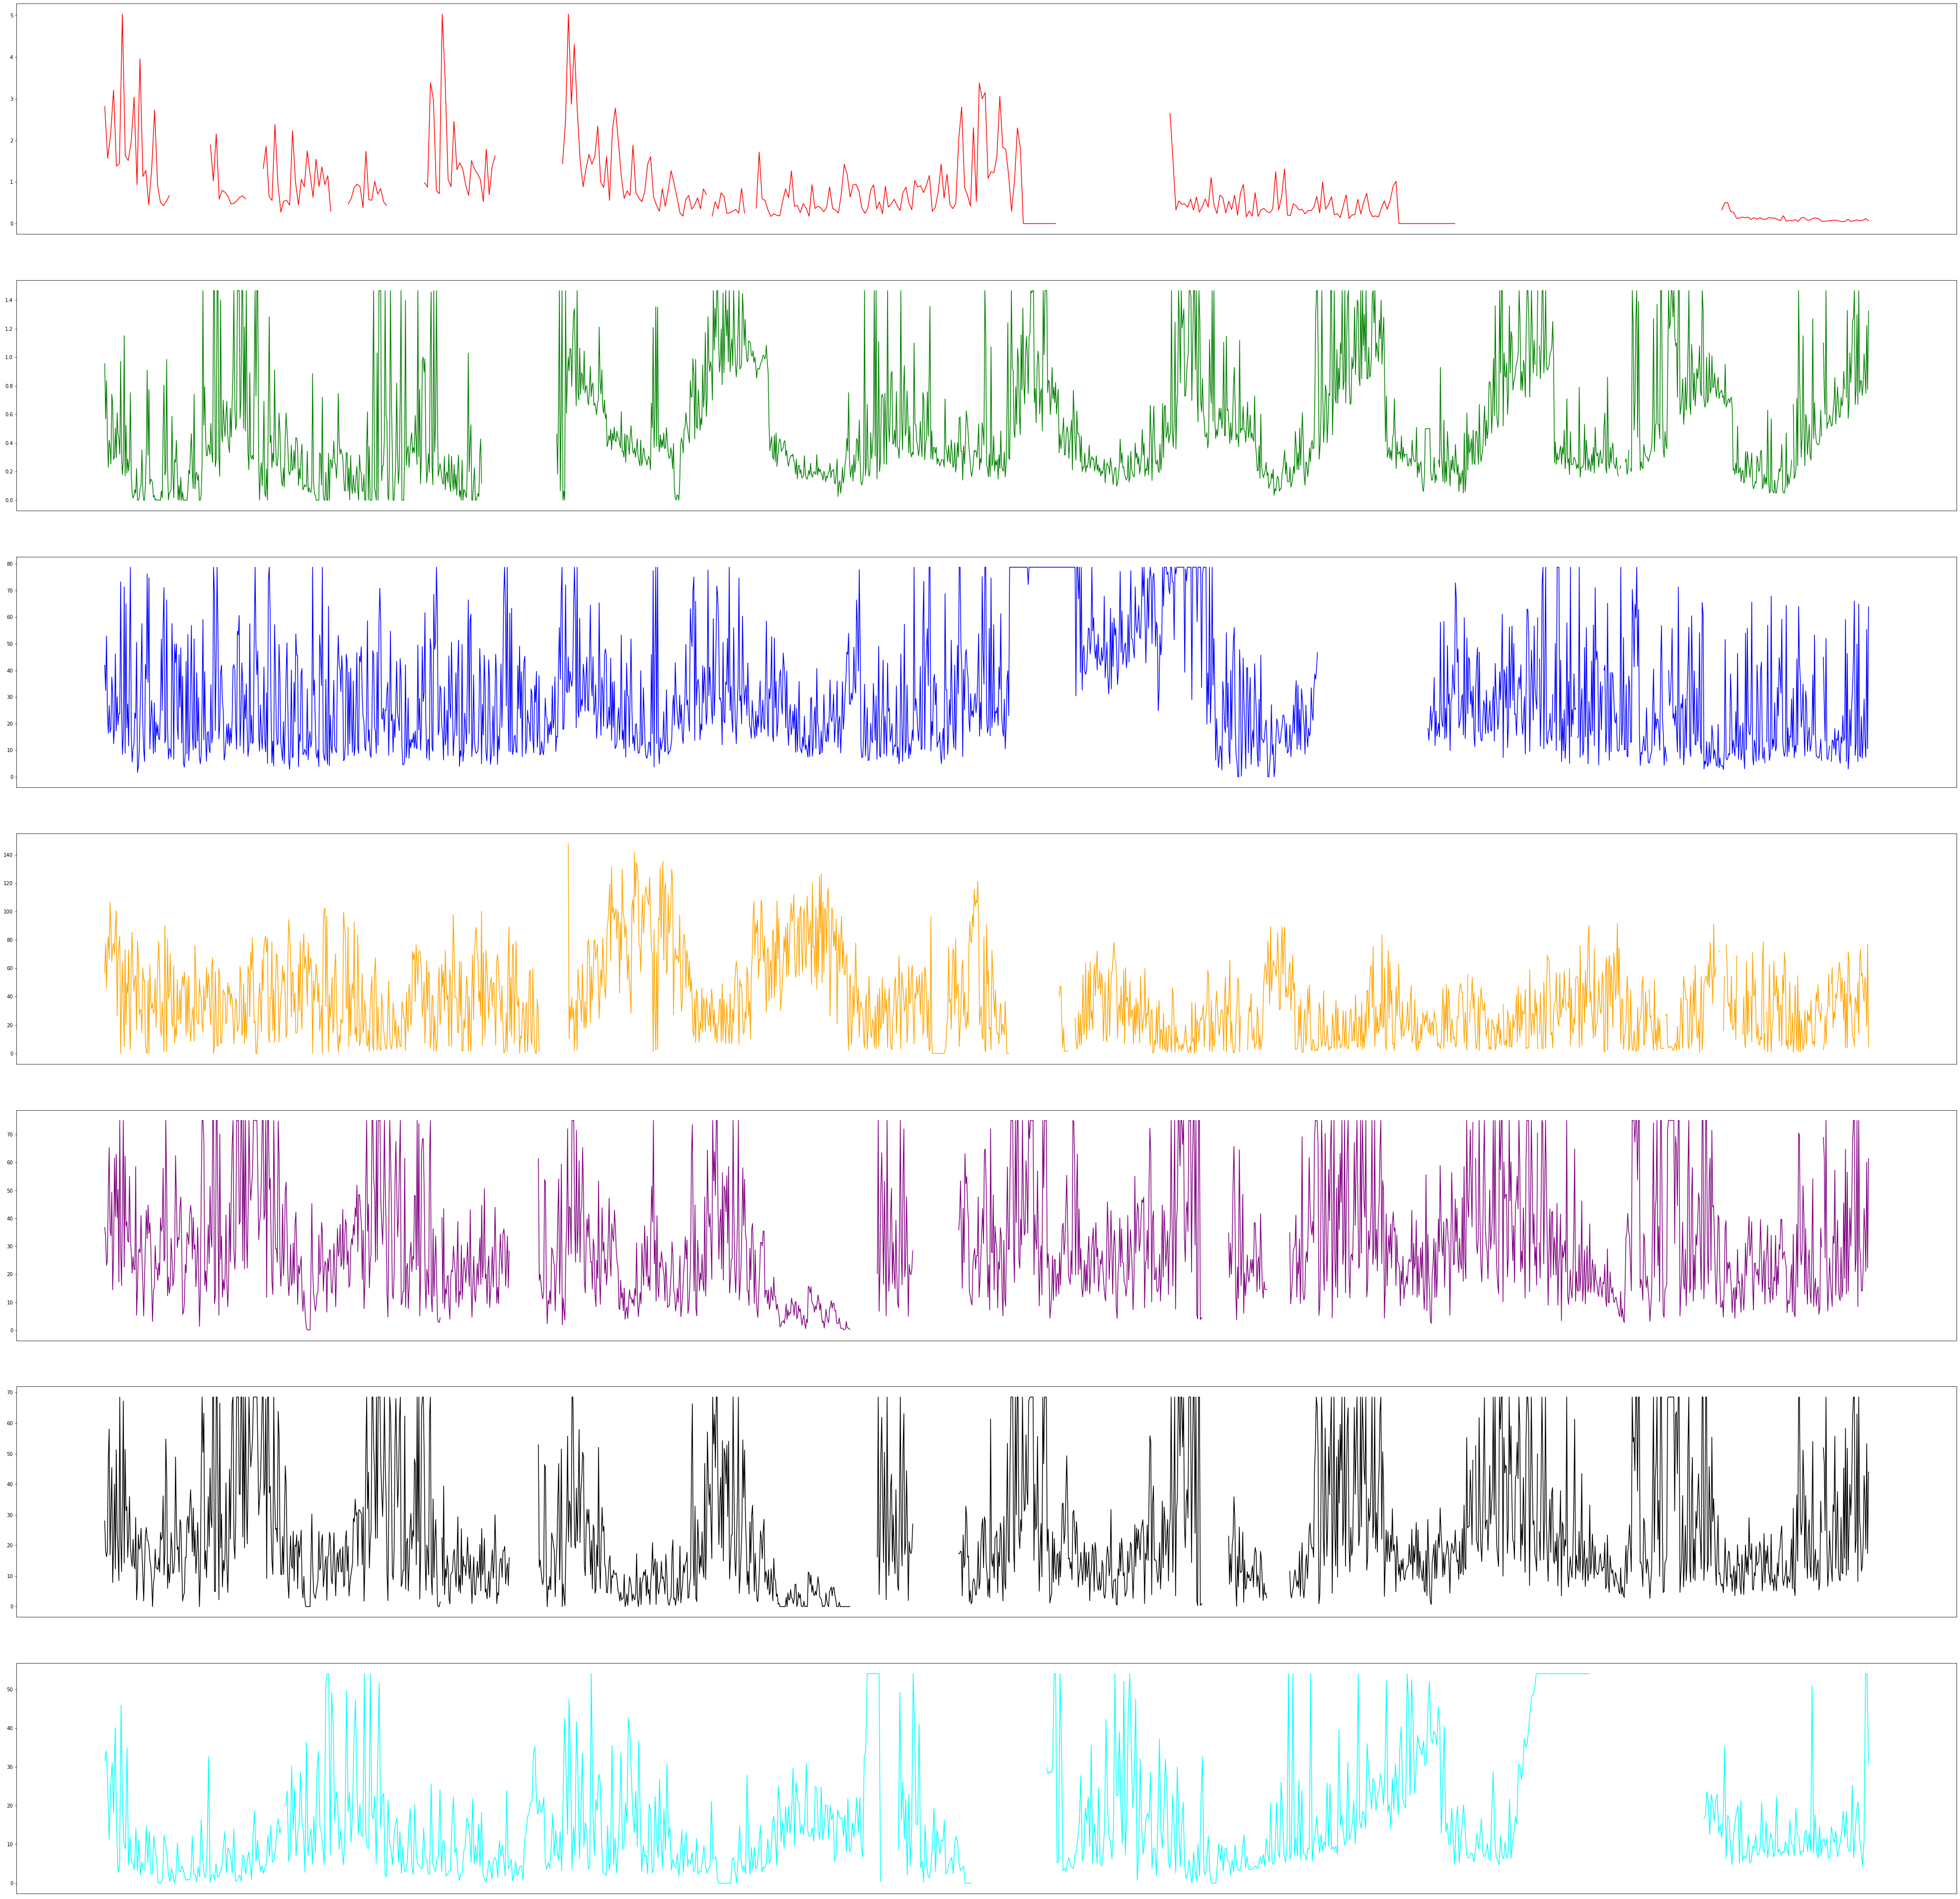

In [70]:
data = autlajeri(data)

<ipython-input-69-2c1dff6808bc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name][i] =  SO2_q3+n*IQR
<ipython-input-69-2c1dff6808bc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name][i] = 0.0
<ipython-input-69-2c1dff6808bc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name][i] = 0.0
<ipython-input-69-2c1dff6808bc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

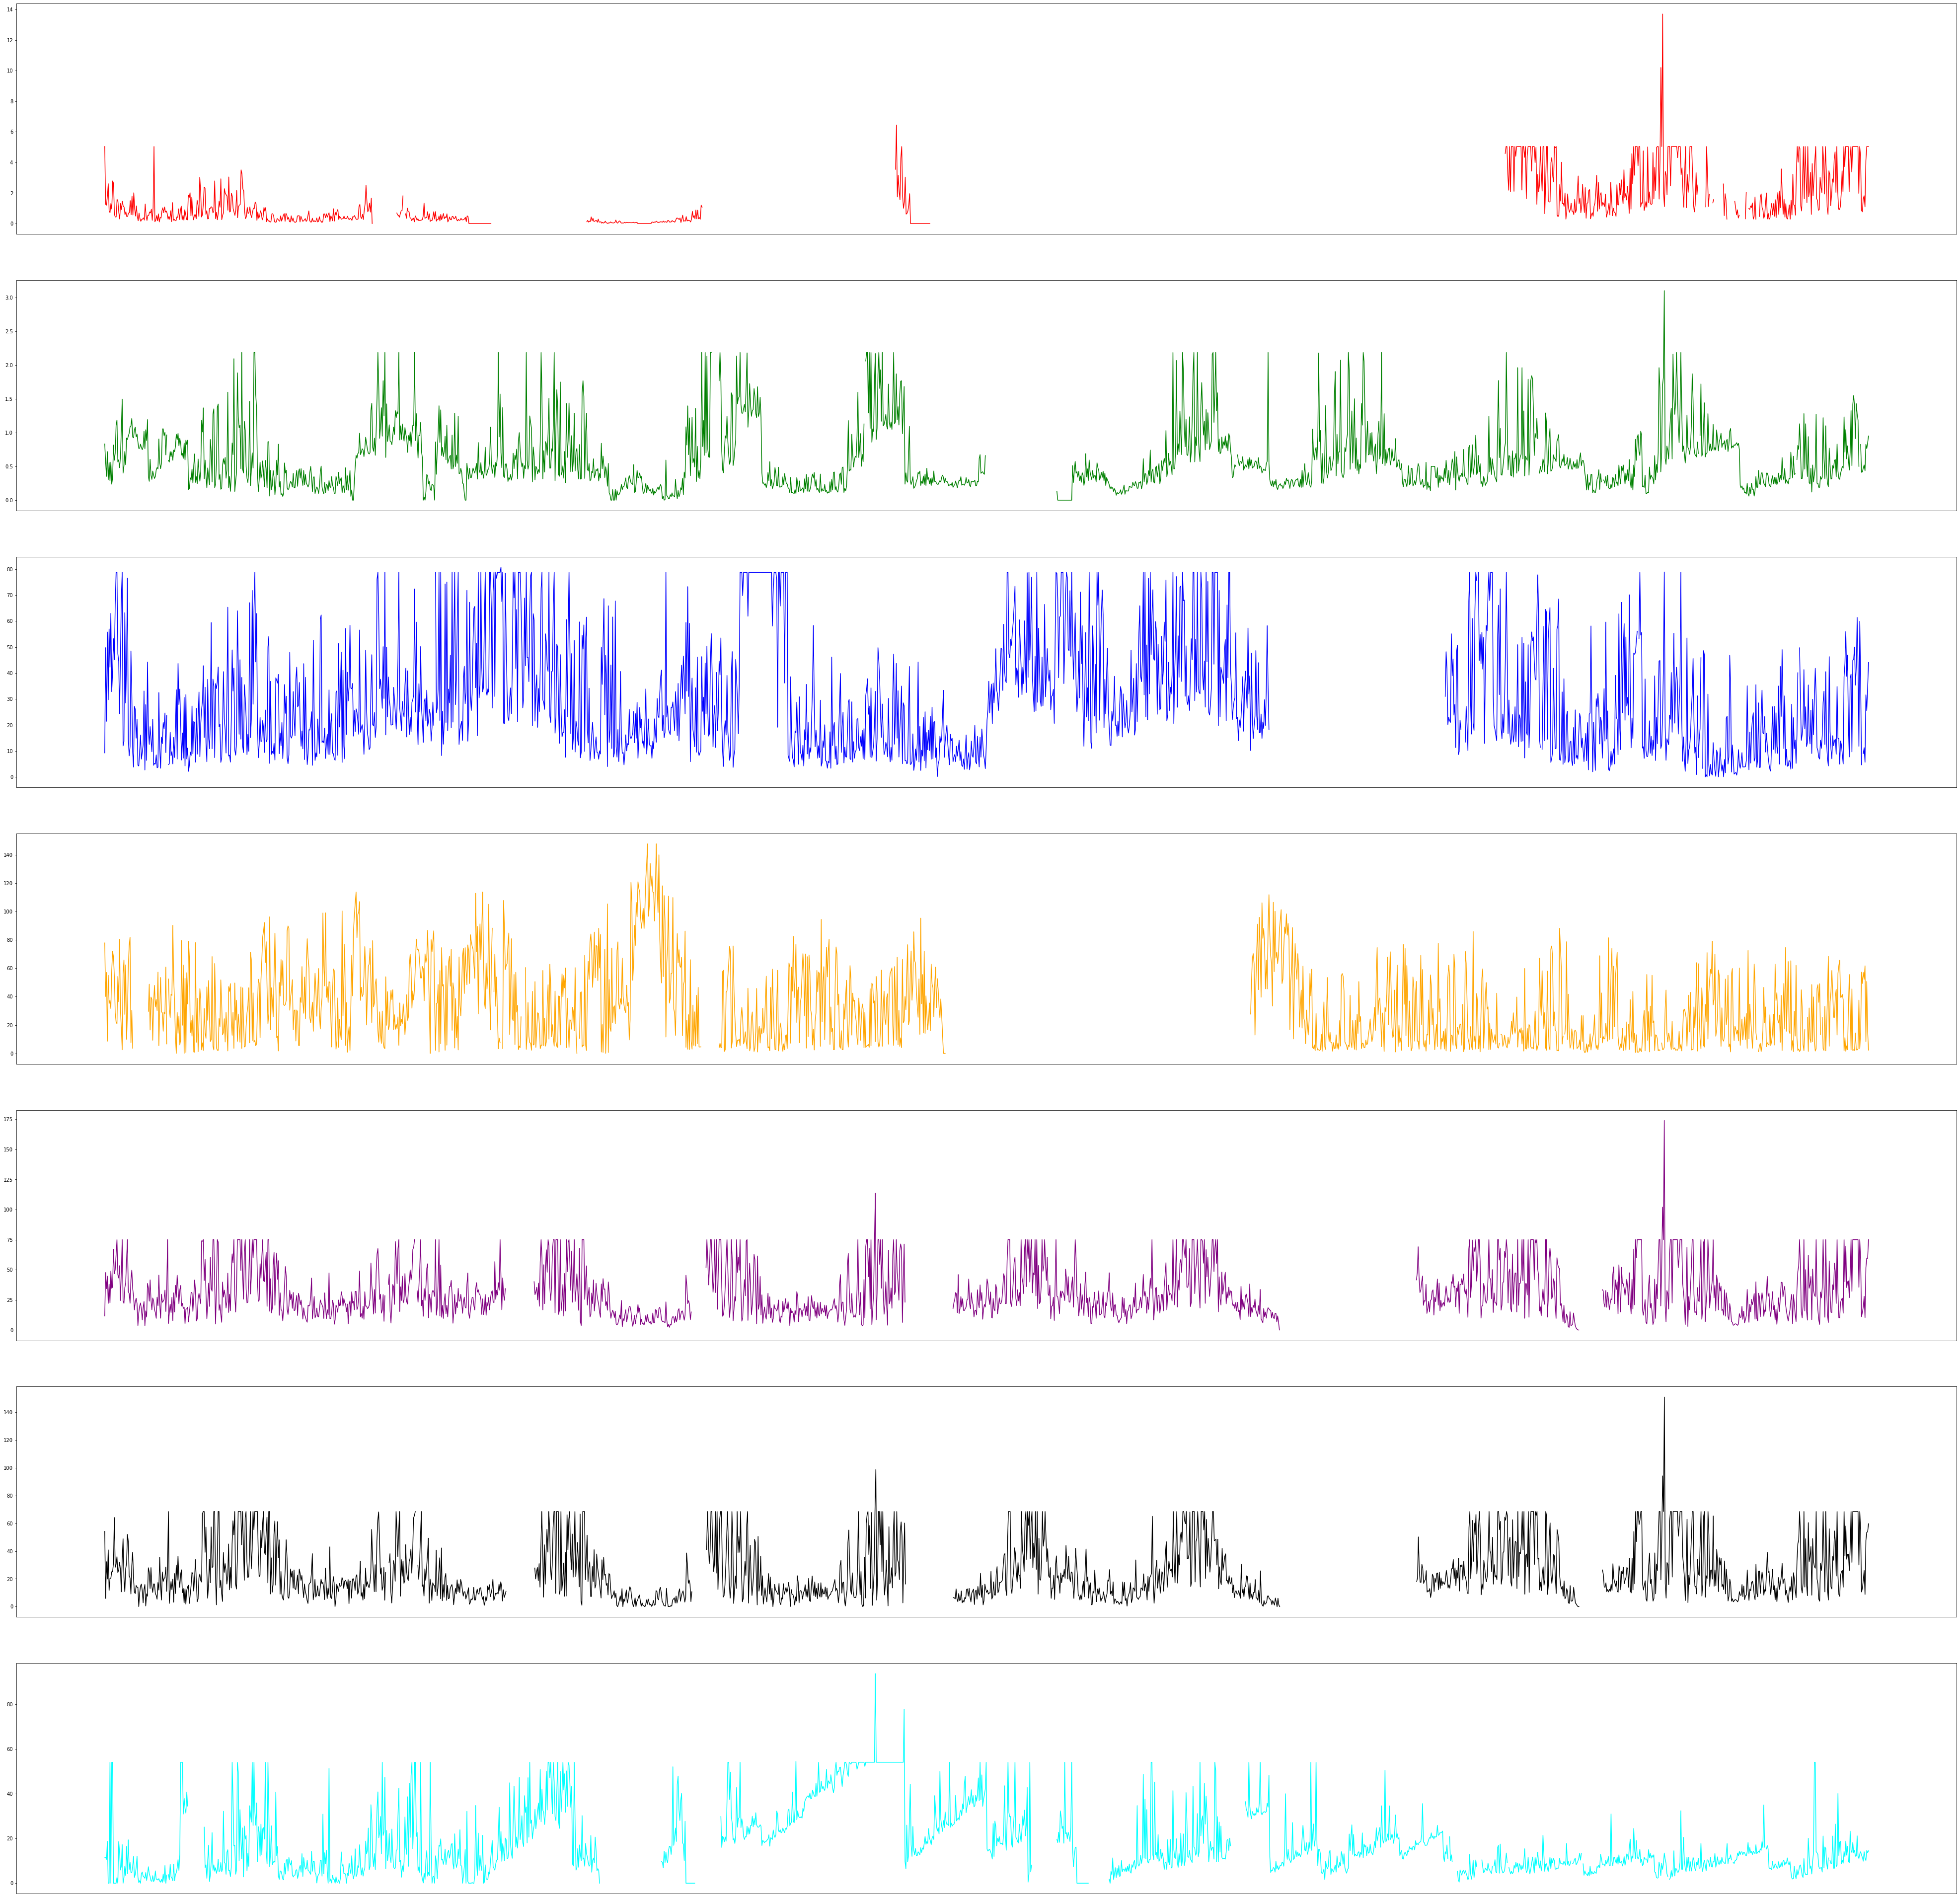

In [71]:
data2 = autlajeri(data2)

In [72]:
# Interpoloacija za temperaturu
def interpolacija(data, name):
    for (index, d1) in enumerate(data[name].values):
        if np.isnan(d1):
            
            data.iloc[index, 1] = (data.iloc[index-1, 1] + data.iloc[index+1, 1]) / 2

In [73]:
def find_next_notnone(data, name):
    for (index, d1) in enumerate(data[name].values):
        if np.isnan(d1):
            return d1

In [74]:
#for (x, y) in zip(data2['Datum_i_Vreme'][::-1], data['Datum_i_Vreme'][::-1]):
    #print(x, y)
print(len(data))
print(len(data2))

95758
97078


In [75]:
data2.head()

Datum_i_Vreme          MernaStanica   B  CO  NO2  O3  PM10  \
23026  2009-11-17 20:00  Beograd Novi Beograd NaN NaN  NaN NaN   NaN   
28045  2009-11-17 21:00  Beograd Novi Beograd NaN NaN  NaN NaN   NaN   
52868  2009-11-17 22:00  Beograd Novi Beograd NaN NaN  NaN NaN   NaN   
68772  2009-11-17 23:00  Beograd Novi Beograd NaN NaN  NaN NaN   NaN   
41525  2009-11-18 00:00  Beograd Novi Beograd NaN NaN  NaN NaN   NaN   

            PM25  SO2  
23026  54.221211  NaN  
28045  61.848214  NaN  
52868  47.386997  NaN  
68772  42.317648  NaN  
41525  41.457331  NaN

In [76]:
def getNum(r1, r2):
    for i in range(len(r1)):
        x = r1[i]
        y = r2[i]
        if np.isnan(x):
            r1[i] = y;
        elif np.isnan(y):
            r1[i] = x
        else:
            r1[i] = np.maximum(x, y)
    return r1

In [77]:
getNum([0.0, 1, np.NaN], [np.NaN, np.NaN, np.NaN])

[0.0, 1, nan]

In [78]:
new_data = pd.merge_ordered(data2, data, on=['Datum_i_Vreme'], how='inner')

new_data['B'] = getNum(new_data['B_x'], new_data['B_y']);
new_data['CO'] = getNum(new_data['CO_x'], new_data['CO_y']);
new_data['NO2'] = getNum(new_data['NO2_x'], new_data['NO2_y']);
new_data['O3'] = getNum(new_data['O3_x'], new_data['O3_y']);
new_data['PM10'] = getNum(new_data['PM10_x'], new_data['PM10_y']);
new_data['PM25'] = getNum(new_data['PM25_x'], new_data['PM25_y']);
new_data['SO2'] = getNum(new_data['SO2_x'], new_data['SO2_y']);
new_data = new_data.drop(['MernaStanica_x', 'MernaStanica_y', 'SO2_x', 'SO2_y', 'B_x', 'B_y', 'CO_x', 'NO2_x', 'O3_x', 'PM10_x', 'PM25_x', 'CO_y', 'NO2_y', 'O3_y', 'PM10_y', 'PM25_y'], axis=1)
new_data.isna().sum()


<ipython-input-76-41dced2254de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1[i] = y;
<ipython-input-76-41dced2254de>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1[i] = np.maximum(x, y)
<ipython-input-76-41dced2254de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1[i] = x


Datum_i_Vreme        0
B                48145
CO                   9
NO2               6164
O3                3375
PM10              4623
PM25              4623
SO2               5269
dtype: int64

In [79]:
data = data.interpolate(method='linear', axis=0)
data = data.bfill()

In [80]:
data.to_csv('training_data.csv')